# **PROYECTO DE PREDICCION DE HIPERTENSION ARTERIAL**

## Importación de Librerias y datos


#### Importación de librerías

In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

#### Lectura de datos

In [81]:
# Lee el archivo CSV
DF = pd.read_csv('/PrediHipertension/dataset/dataset_hypertension.csv')
print ('Forma inicial del DataFrame: ' , DF.shape)
# Define el nombre de la columna que deseas mover al último lugar y realiza la operación
columna_a_mover = 'HighBP'
if columna_a_mover in DF.columns:
    DF = DF[[col for col in DF.columns if col != columna_a_mover] + [columna_a_mover]].rename(columns={'HighBP': 'Hypertension'})

# Define las columnas a eliminar y elimínalas si están presentes
columnas_a_eliminar = ['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income']
DF = DF.drop(columns=[col for col in columnas_a_eliminar if col in DF.columns])

# Define el orden deseado de las columnas y reordena el DataFrame según el nuevo orden
nuevo_orden = ['Age', 'Sex', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'HighChol', 'CholCheck', 'Diabetes', 'Stroke', 'HeartDiseaseorAttack', 'Hypertension']
DF = DF[nuevo_orden]

# Imprime la forma del DataFrame y muestra las primeras 10 filas
print('Forma final del DataFrame:', DF.shape)
DF.head(10)


Forma inicial del DataFrame:  (253680, 22)
Forma final del DataFrame: (253680, 18)


,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
0,9.0,0.0,40.0,5.0,18.0,15.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,7.0,0.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,0.0,28.0,5.0,30.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,11.0,0.0,27.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,11.0,0.0,24.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
5,10.0,1.0,25.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
6,9.0,0.0,30.0,3.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,11.0,0.0,25.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
8,9.0,0.0,30.0,5.0,30.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0
9,8.0,1.0,24.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Procesamiento de datos

#### Valores nulos

In [82]:
DF.isnull().sum()

Age                     0
Sex                     0
BMI                     0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Fruits                  0
Veggies                 0
Smoker                  0
HvyAlcoholConsump       0
PhysActivity            0
HighChol                0
CholCheck               0
Diabetes                0
Stroke                  0
HeartDiseaseorAttack    0
Hypertension            0
dtype: int64

#### Información de las columnas del DataFrame

In [83]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   253680 non-null  float64
 1   Sex                   253680 non-null  float64
 2   BMI                   253680 non-null  float64
 3   GenHlth               253680 non-null  float64
 4   MentHlth              253680 non-null  float64
 5   PhysHlth              253680 non-null  float64
 6   DiffWalk              253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   Smoker                253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  PhysActivity          253680 non-null  float64
 12  HighChol              253680 non-null  float64
 13  CholCheck             253680 non-null  float64
 14  Diabetes              253680 non-null  float64
 15  

#### Descripción estadística de las variables

In [84]:
DF.describe()

,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,8.032119,0.440342,28.382364,2.511392,3.184772,4.242081,0.168224,0.634256,0.811420,0.443169,0.056197,0.756544,0.424121,0.962670,0.296921,0.040571,0.094186,0.429001
std,3.054220,0.496429,6.608694,1.068477,7.412847,8.717951,0.374066,0.481639,0.391175,0.496761,0.230302,0.429169,0.494210,0.189571,0.698160,0.197294,0.292087,0.494934
min,1.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,27.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.000000,31.000000,3.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,13.000000,1.000000,98.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


## Análisis exploratorio de datos

#### Cantidad de pacientes sanos e hipertensos

Tienen Hipertensión:  108829
No tienen Hipertensión:  144851


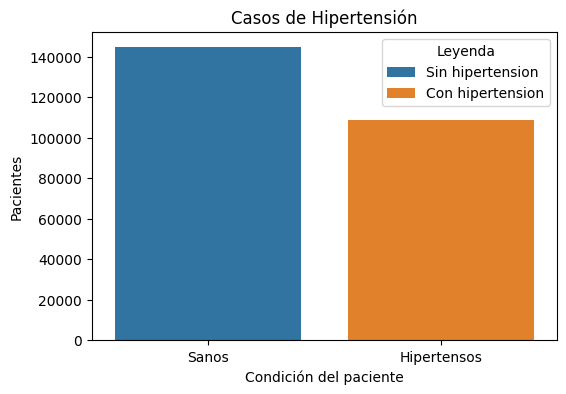

In [85]:
# Cantidad de pacientes con hipertensión
print('Tienen Hipertensión: ',DF.Hypertension.value_counts()[1])
print('No tienen Hipertensión: ', DF.Hypertension.value_counts()[0])
DF['Hypertension'].value_counts()

# Establece el tamaño de la figura
plt.figure(figsize=(6, 4))

# Cuadro comparativo de pacientes hipertensos y no hipertensos
sns.countplot(data=DF,x='Hypertension',hue='Hypertension')
plt.title('Casos de Hipertensión')
plt.xlabel('Condición del paciente')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.ylabel('Pacientes')
plt.legend(title='Leyenda', labels =['Sin hipertension', 'Con hipertension'])

#### Influencia de la edad con la  hipertension


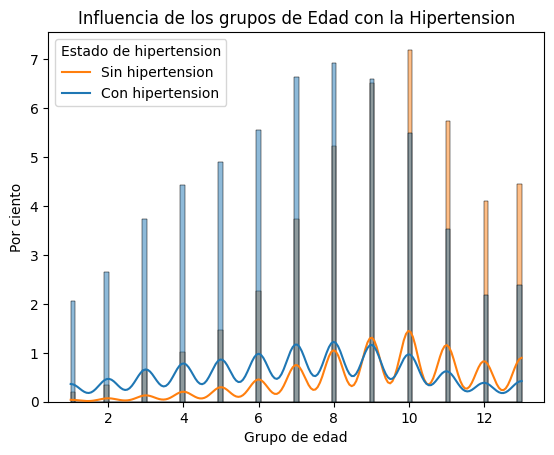

In [86]:
sns.histplot(data=DF,x='Age',hue='Hypertension',kde=True,stat='percent')

plt.title('Influencia de los grupos de Edad con la Hipertension')
plt.xlabel('Grupo de edad')
plt.ylabel('Por ciento')
plt.legend(title='Estado de hipertension', labels =['Sin hipertension', 'Con hipertension'])

#### Cantidad de hombres y mujeres en el DataFrame

Hombres: 111706
Mujeres: 141974
-----------------------------------------------
Mujeres sanas: 84321
Mujeres hipertensas: 57653
Hombres sanos: 60530
Hombres hipertensos: 51176


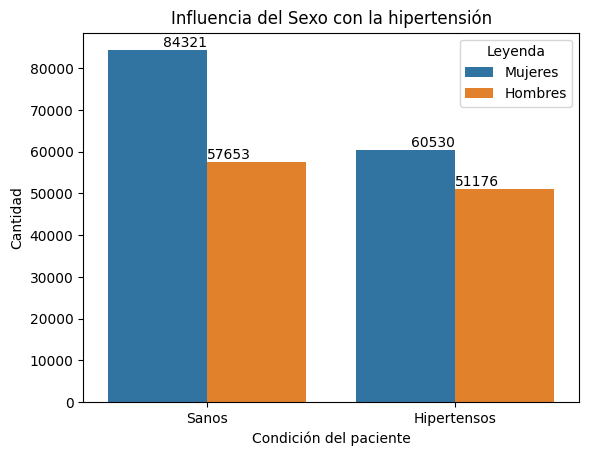

In [87]:
# Cantidad de hombres y mujeres en el DataFrame
hombres_count = DF['Sex'].value_counts()[1]
mujeres_count = DF['Sex'].value_counts()[0]
print('Hombres:', hombres_count)
print('Mujeres:', mujeres_count)
print('-----------------------------------------------')

# Cálculo de la cantidad de personas sanas e hipertensas para hombres y mujeres
sanos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 0)])
hipertensos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 1)])
sanos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 0)])
hipertensos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 1)])
print('Mujeres sanas:', sanos_mujeres)
print('Mujeres hipertensas:', hipertensos_mujeres)
print('Hombres sanos:', sanos_hombres)
print('Hombres hipertensos:', hipertensos_hombres)

# Visualización del gráfico
sns.countplot(data=DF, x='Sex', hue='Hypertension')
plt.title('Influencia del Sexo con la hipertensión')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.legend(title='Leyenda', labels=['Mujeres', 'Hombres'])

# Agregar el texto correspondiente a cada columna
plt.text(0, sanos_mujeres, sanos_mujeres, ha='right', va='bottom')
plt.text(0, hipertensos_mujeres, hipertensos_mujeres, ha='left', va='bottom')
plt.text(1, sanos_hombres, sanos_hombres, ha='right', va='bottom')
plt.text(1, hipertensos_hombres, hipertensos_hombres, ha='left', va='bottom')

plt.show()


#### Influencia del IMC con la hipertension


Hombres:  111706
Mujeres:  141974


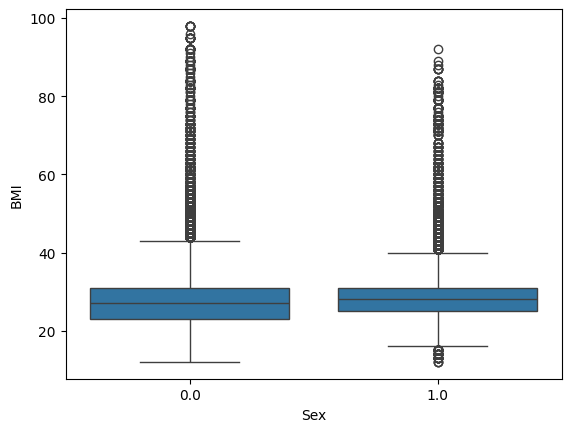

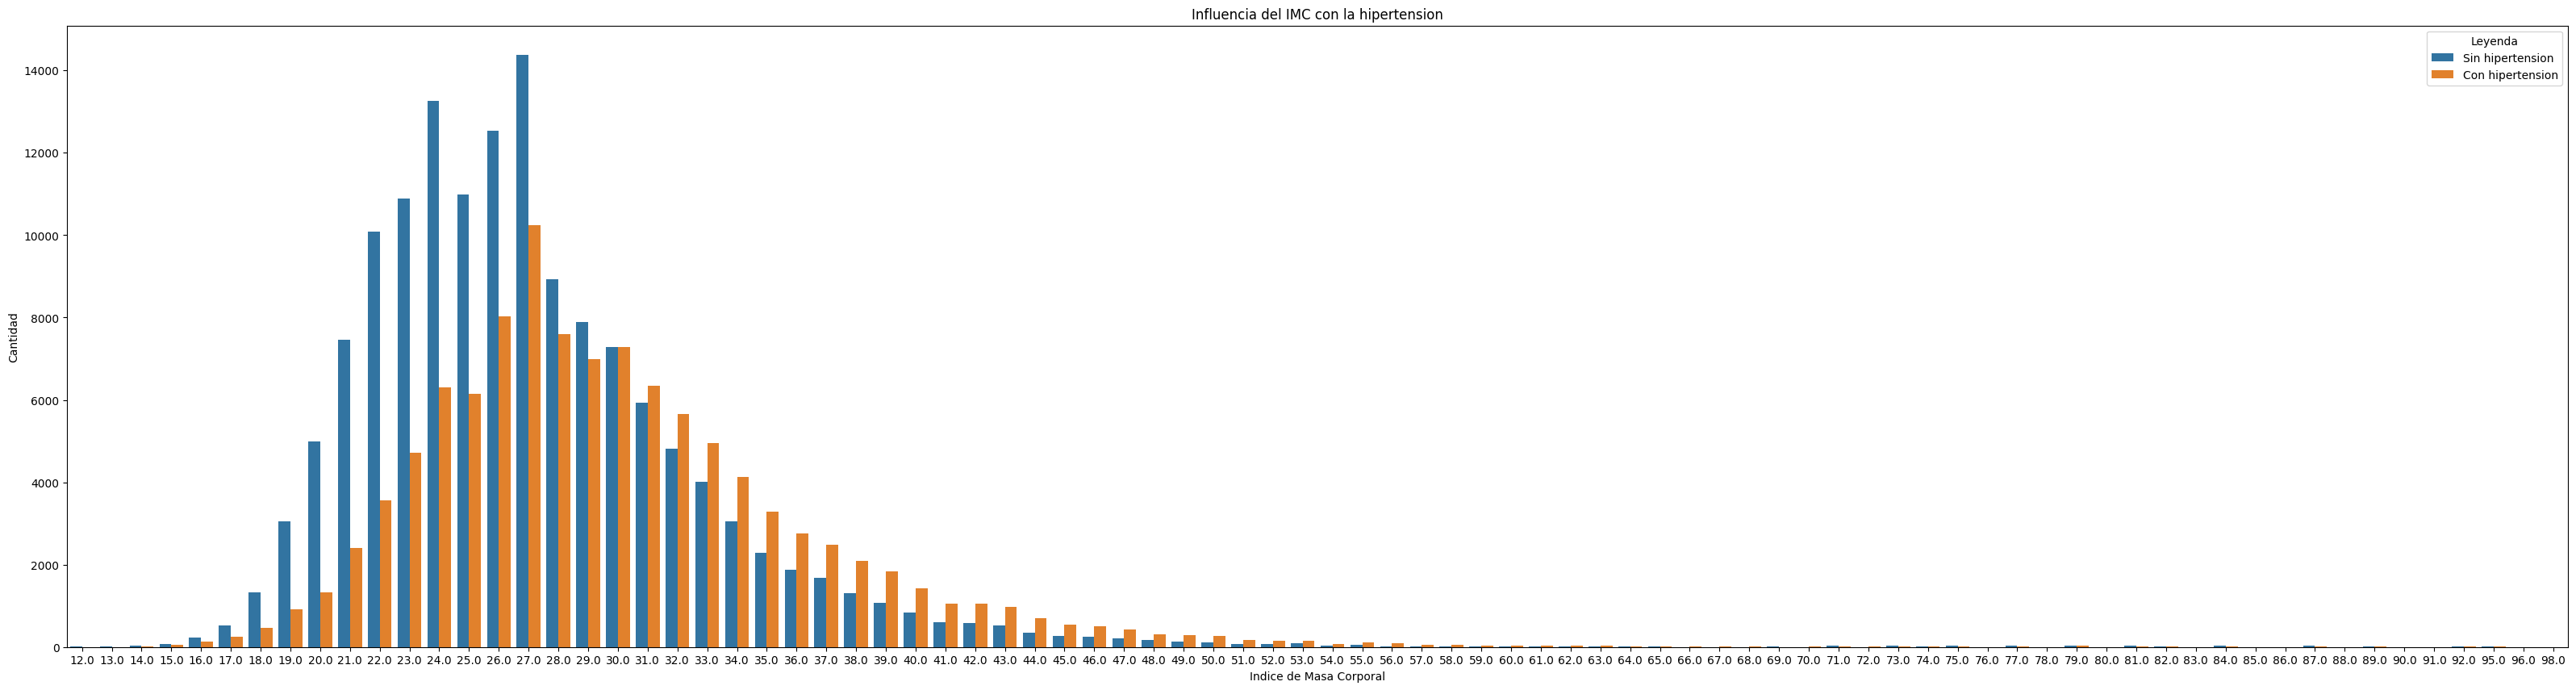

In [88]:
print('Hombres: ', DF.Sex.value_counts()[1])
print('Mujeres: ', DF.Sex.value_counts()[0])
sns.boxplot(x='Sex', y='BMI', data=DF)
plt.show()

plt.figure(figsize=(40, 10))
sns.countplot(data=DF,x='BMI',hue='Hypertension')
plt.title('Influencia del IMC con la hipertension')
plt.xlabel('Indice de Masa Corporal')
plt.ylabel('Cantidad')
plt.legend(title='Leyenda', labels =['Sin hipertension', 'Con hipertension'])

#### Mostrar información general de salud por sexo del paciente


Excelente:  45299
Muy bueno:  89084
Bueno:  75646
Regular:  31570
Deficiente:  12081


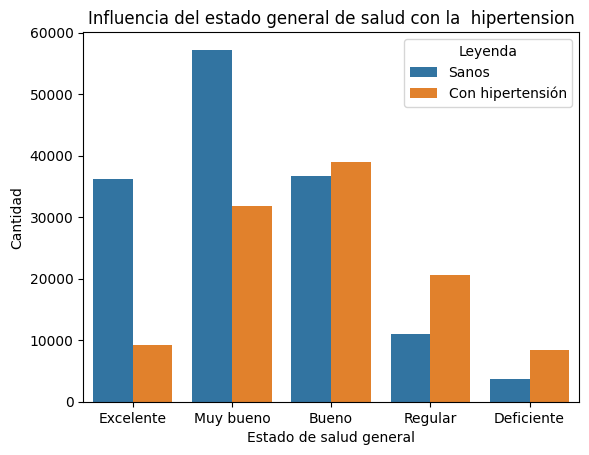

In [89]:
# Cantidad de pacientes por salud en general
print('Excelente: ', DF.GenHlth.value_counts()[1])
print('Muy bueno: ', DF.GenHlth.value_counts()[2])
print('Bueno: ', DF.GenHlth.value_counts()[3])
print('Regular: ', DF.GenHlth.value_counts()[4])
print('Deficiente: ', DF.GenHlth.value_counts()[5])

sns.countplot(data=DF,x='GenHlth',hue='Hypertension')
plt.title('Influencia del estado general de salud con la  hipertension')
plt.xlabel('Estado de salud general')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Excelente', 'Muy bueno', 'Bueno', 'Regular', 'Deficiente'])
plt.legend(title='Leyenda', labels =['Sanos', 'Con hipertensión'])

#### Consumo de frutas

Comen frutas:  160898
No comen frutas:  92782


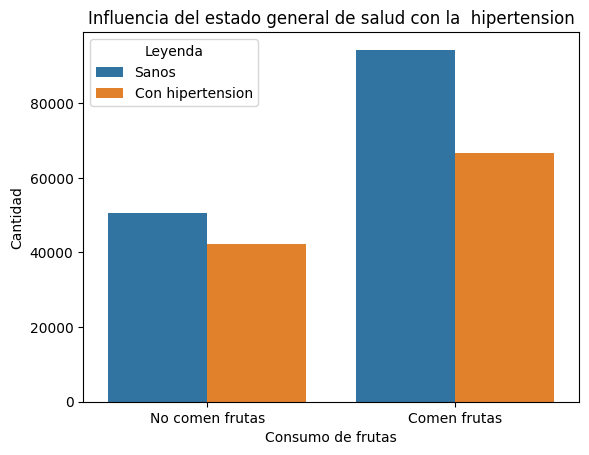

In [90]:
# Cantidad de pacientes que comen frutas
print('Comen frutas: ',DF.Fruits.value_counts()[1])
print('No comen frutas: ',DF.Fruits.value_counts()[0])
# 3. Influencia del grado academico con la  hipertension
sns.countplot(data=DF,x='Fruits',hue='Hypertension')
plt.title('Influencia del estado general de salud con la  hipertension')
plt.xlabel('Consumo de frutas')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No comen frutas', 'Comen frutas'])
plt.legend(title='Leyenda', labels =['Sanos', 'Con hipertension'])

Comen frutas: 160898
No comen frutas: 92782
-----------------------------------------------
Pacientes sanos que no comen frutas: 50526
Pacientes hipertensos que no comen frutas: 42256
Pacientes sanos que comen frutas: 94325
Pacientes hipertensos que comen frutas: 66573


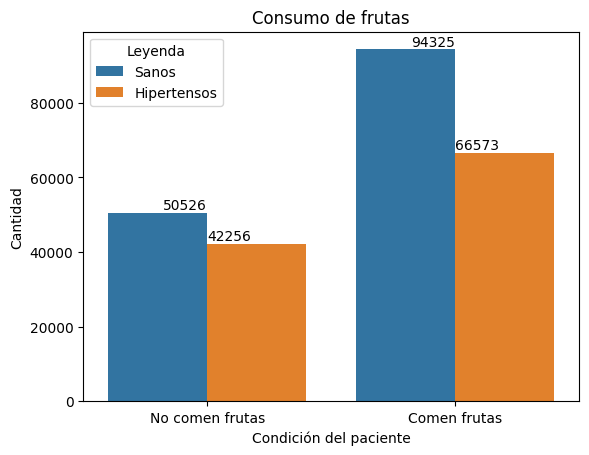

In [91]:
# Cantidad de hombres y mujeres en el DataFrame
comen_frutas = DF['Fruits'].value_counts()[1]
no_comen_frutas = DF['Fruits'].value_counts()[0]
print('Comen frutas:', comen_frutas)
print('No comen frutas:', no_comen_frutas)
print('-----------------------------------------------')

# Cálculo de la cantidad de personas sanas e hipertensas para hombres y mujeres
nofrutas_sanos = len(DF[(DF['Fruits'] == 0) & (DF['Hypertension'] == 0)])
nofrutas_hipertensos = len(DF[(DF['Fruits'] == 0) & (DF['Hypertension'] == 1)])
frutas_sanos = len(DF[(DF['Fruits'] == 1) & (DF['Hypertension'] == 0)])
frutas_hipertensos = len(DF[(DF['Fruits'] == 1) & (DF['Hypertension'] == 1)])
print('Pacientes sanos que no comen frutas:', nofrutas_sanos)
print('Pacientes hipertensos que no comen frutas:', nofrutas_hipertensos)
print('Pacientes sanos que comen frutas:', frutas_sanos)
print('Pacientes hipertensos que comen frutas:', frutas_hipertensos)

# Visualización del gráfico
sns.countplot(data=DF, x='Fruits', hue='Hypertension')
plt.title('Consumo de frutas')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No comen frutas', 'Comen frutas'])
plt.legend(title='Leyenda', labels=['Sanos', 'Hipertensos'])

# Agregar el texto correspondiente a cada columna
plt.text(0, nofrutas_sanos, nofrutas_sanos, ha='right', va='bottom')
plt.text(0, nofrutas_hipertensos, nofrutas_hipertensos, ha='left', va='bottom')
plt.text(1, frutas_sanos, frutas_sanos, ha='right', va='bottom')
plt.text(1, frutas_hipertensos, frutas_hipertensos, ha='left', va='bottom')

plt.show()


## Balanceo de datos

Sin SMOTE

In [92]:
x = DF.drop('Hypertension', axis= 1).values
y = DF['Hypertension']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state= 42)
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize = True)[1] * 100, 2)}
% Positive class in Test = {np.round(y_test.value_counts(normalize = True)[1] * 100, 2)}''')

% Positive class in Train = 42.82
% Positive class in Test = 43.22


Accuracy = 0.70
Precision = 0.66
Recall = 0.64
F1_score = 0.65



<Axes: title={'center': 'Matriz de confusion (sin SMOTE)'}>

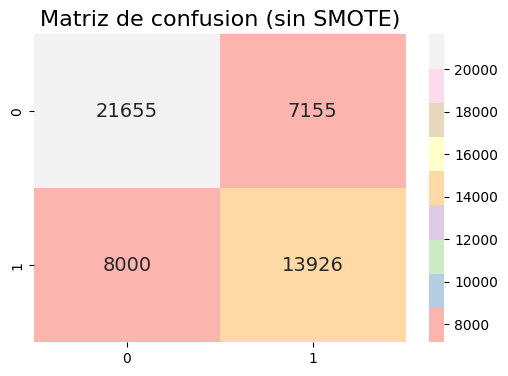

In [93]:
# Train
model = RandomForestClassifier(random_state=99)
model.fit(x_train, y_train)
preds = model.predict(x_test)

# Evaluacion
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nPrecision = {precision_score(y_test, preds):.2f}\nRecall = {recall_score(y_test,preds):.2f}\nF1_score = {f1_score(y_test,preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))
plt.title('Matriz de confusion (sin SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14})

Con SMOTE

In [94]:
x = DF.drop('Hypertension', axis=1).values
y = DF['Hypertension']

sm = SMOTE(random_state= 42)

x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Cambio de X antes de SMOTE: {x.shape}
Cambio de x despues de SMOTE: {x_sm.shape}''')

print('\nBalance positivo y negativo de las clases (%):')
y_sm.value_counts(normalize= True)*100

Cambio de X antes de SMOTE: (253680, 17)
Cambio de x despues de SMOTE: (289702, 17)

Balance positivo y negativo de las clases (%):


Hypertension
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64

<Axes: title={'center': 'Matriz de confusion (con SMOTE)'}>

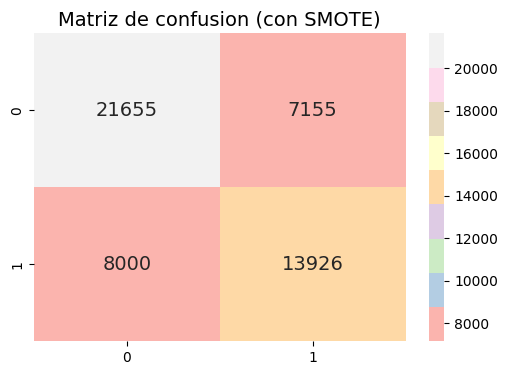

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.20, random_state=42)

model = RandomForestClassifier(random_state=99)
model.fit(x_train, y_train)

plt.figure(figsize=(6, 4))
plt.title('Matriz de confusion (con SMOTE)', size=14)
sns.heatmap(cm, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14})


## Entrenamiento del modelo

Resultados para el conjunto de entrenamiento:
Exactitud: 0.929
Precisión: 0.941
Recall: 0.916
Puntuación F1: 0.928
Matriz de confusión para el conjunto de entrenamiento:
 [[109160   6708]
 [  9777 106116]]


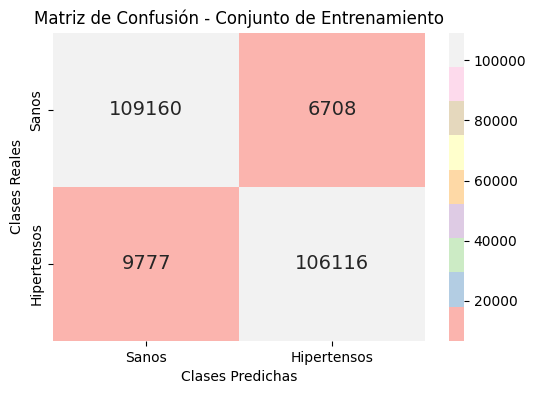


Resultados para el conjunto de prueba:
Exactitud: 0.731
Precisión: 0.732
Recall: 0.728
Puntuación F1: 0.73
Matriz de confusión para el conjunto de prueba:
 [[21271  7712]
 [ 7888 21070]]


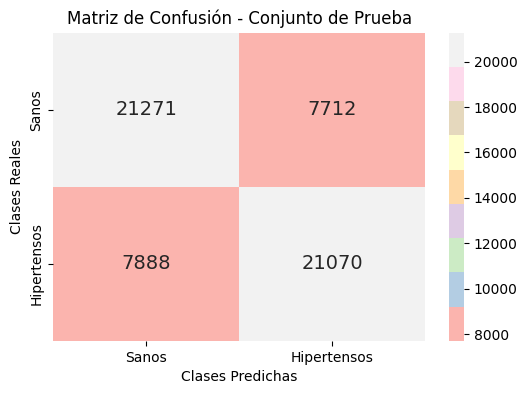

In [96]:
# Precisión en el conjunto de datos de entrenamiento
exactitud_entrenamiento = round(accuracy_score(y_train, model.predict(x_train)), 3)
precision_entrenamiento = round(precision_score(y_train, model.predict(x_train)), 3)
recall_entrenamiento = round(recall_score(y_train, model.predict(x_train)), 3)
f1_entrenamiento = round(f1_score(y_train, model.predict(x_train)), 3)
confusion_mat_train = confusion_matrix(y_train, model.predict(x_train))

# Precisión en el conjunto de datos de prueba
exactitud_prueba = round(accuracy_score(y_test, model.predict(x_test)), 3)
precision_prueba = round(precision_score(y_test, model.predict(x_test)), 3)
recall_prueba = round(recall_score(y_test, model.predict(x_test)), 3)
f1_prueba = round(f1_score(y_test, model.predict(x_test)), 3)
confusion_mat_test = confusion_matrix(y_test, model.predict(x_test))

# Función para graficar matriz de confusión
def plot_confusion_matrix(confusion_matrix, classes, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Clases Predichas')
    plt.ylabel('Clases Reales')
    plt.title(title)
    plt.show()

# Imprimir resultados para el conjunto de entrenamiento
print("Resultados para el conjunto de entrenamiento:")
print("Exactitud:", exactitud_entrenamiento)
print("Precisión:", precision_entrenamiento)
print("Recall:", recall_entrenamiento)
print("Puntuación F1:", f1_entrenamiento)
print("Matriz de confusión para el conjunto de entrenamiento:\n", confusion_mat_train)

# Graficar matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(confusion_mat_train, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Entrenamiento')

# Imprimir resultados para el conjunto de prueba
print("\nResultados para el conjunto de prueba:")
print("Exactitud:", exactitud_prueba)
print("Precisión:", precision_prueba)
print("Recall:", recall_prueba)
print("Puntuación F1:", f1_prueba)
print("Matriz de confusión para el conjunto de prueba:\n", confusion_mat_test)

# Graficar matriz de confusión para el conjunto de prueba
plot_confusion_matrix(confusion_mat_test, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Prueba')

In [97]:
DF.head()

,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
0,9.0,0.0,40.0,5.0,18.0,15.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,7.0,0.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,0.0,28.0,5.0,30.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,11.0,0.0,27.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,11.0,0.0,24.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [102]:
# Define los valores para cada columna
Age = 7.0 # 1: 18 -24 | 2: 25 - 29 | 3: 30 - 34 | 4: 35 - 39 | 5: 40 - 44 | 6: 45 - 49 | 7: 50 - 54 | 8: 55 - 59 | 9: 60 - 64 | 10: 65 - 69 | 11: 70 - 74 | 12: 75 - 79 | 13: 80 - 100
Sex = 1.0 #[Hombre = 0, Mujer = 1]
BMI = 6.0 
GenHlth = 3 # Excelente = 1 | Muy bueno = 2 | Bueno = 3 | Regular = 4 | Deficiente = 5 
MentHlth = 1.0 
PhysHlth = 1.0
DiffWalk = 1.0 # [Si = 1 | No = 0]
Fruits = 1.0 # [Si = 1 | No = 0]
Veggies = 1.0 # [Si = 1 | No = 0]
Smoker = 1.0 # [Si = 1 | No = 0]
HvyAlcoholConsump = 1.0 # [Si = 1 | No = 0]
PhysActivity = 0.0 # [Si = 1 | No = 0]
HighChol = 0.0 # [Si = 1 | No = 0]
CholCheck = 0.0 # [Si = 1 | No = 0]
Diabetes = 1.0 # Sin diabetes = 0 | Prediabetes = 1 | Diabetes = 2
Stroke = 0.0 # [Si = 1 | No = 0]
HeartDiseaseorAttack = 0.0 # [Si = 1 | No = 0]

# Crea el array xnew con los valores definidos
xnew = np.array([[Age, Sex, BMI, GenHlth, MentHlth, PhysHlth, DiffWalk, Fruits, Veggies, Smoker, HvyAlcoholConsump, PhysActivity, HighChol, CholCheck, Diabetes, Stroke, HeartDiseaseorAttack]])

# xnew = np.array([[0.0, 1.0, 1.0, 22, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 30.0, 30.0, 0.0, 0.0, 7.0]])
ynew = model.predict(xnew)

if ynew[0] == 0:
    mensaje = 'Felicidades\nEres un paciente con buen estado de salud'
else:
    mensaje = 'A tomar precauciones!!!\nEres un paciente propenso a desarrollar hipertensión arterial'
print(f'input_data = {xnew[0]} \nPredicted = {ynew[0]}')
# print('\n')
print(mensaje)

input_data = [7. 1. 6. 3. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.] 
Predicted = 0.0
Felicidades
Eres un paciente con buen estado de salud
